In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from IPython import display

In [4]:

data = pd.read_csv("./dataset.csv")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Foret aleatoire

In [5]:

X = data.drop('Target', axis=1)  
y = data['Target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy sur l'ensemble de test: {accuracy:.2%}")
print(classification_report(y_test, y_pred))



accuracy sur l'ensemble de test: 77.29%
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.53      0.32      0.40       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.68       885
weighted avg       0.76      0.77      0.76       885



### Optimisation du modele

In [4]:

#les hyperparametres a tester
param_grid = {
    'n_estimators': [100, 300, 600, 1000],
    'max_depth': [7, 10, 15, 20, 25], 
    'max_features':  [None, 'sqrt', 0.2, 0.3, 0.4, 0.5], 
    'criterion': ['gini', 'entropy'] 
}

rf = RandomForestClassifier(random_state=42)


rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    verbose=2,
    n_jobs=-1  
)

rf_grid.fit(X_train, y_train)


resultats = {
    'n_estimators': [],
    'max_depth': [],
    'max_features':  [], 
    'criterion': [] 
}


best_params = rf_grid.best_params_
resultats['n_estimators'].append(best_params.get('n_estimators'))
resultats['max_depth'].append(best_params.get('max_depth'))
resultats['max_features'].append(best_params.get('max_features'))
resultats['criterion'].append(best_params.get('criterion'))


df = pd.DataFrame(resultats)
print('hyperparametres optimaux')
display.display(df)

#evaluation
best_model = rf_grid.best_estimator_
best_cv_score = rf_grid.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.3f}\n')


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test après optimisation: {accuracy:.2%}")

print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
hyperparametres optimaux


,n_estimators,max_depth,max_features,criterion
0,300,15,0.4,gini


Moyenne des scores de validation croisé: 0.779

Accuracy sur l'ensemble de test après optimisation: 76.95%
              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       316
    Enrolled       0.53      0.35      0.42       151
    Graduate       0.77      0.93      0.84       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



                                          features  importance
28             Curricular units 2nd sem (approved)    0.210745
22             Curricular units 1st sem (approved)    0.104193
29                Curricular units 2nd sem (grade)    0.094627
23                Curricular units 1st sem (grade)    0.063046
14                         Tuition fees up to date    0.047503
27          Curricular units 2nd sem (evaluations)    0.038929
3                                           Course    0.038574
17                               Age at enrollment    0.037561
21          Curricular units 1st sem (evaluations)    0.034604
10                             Father's occupation    0.030339
9                              Mother's occupation    0.028636
33                                             GDP    0.025039
8                           Father's qualification    0.022989
26             Curricular units 2nd sem (enrolled)    0.022366
7                           Mother's qualification    0

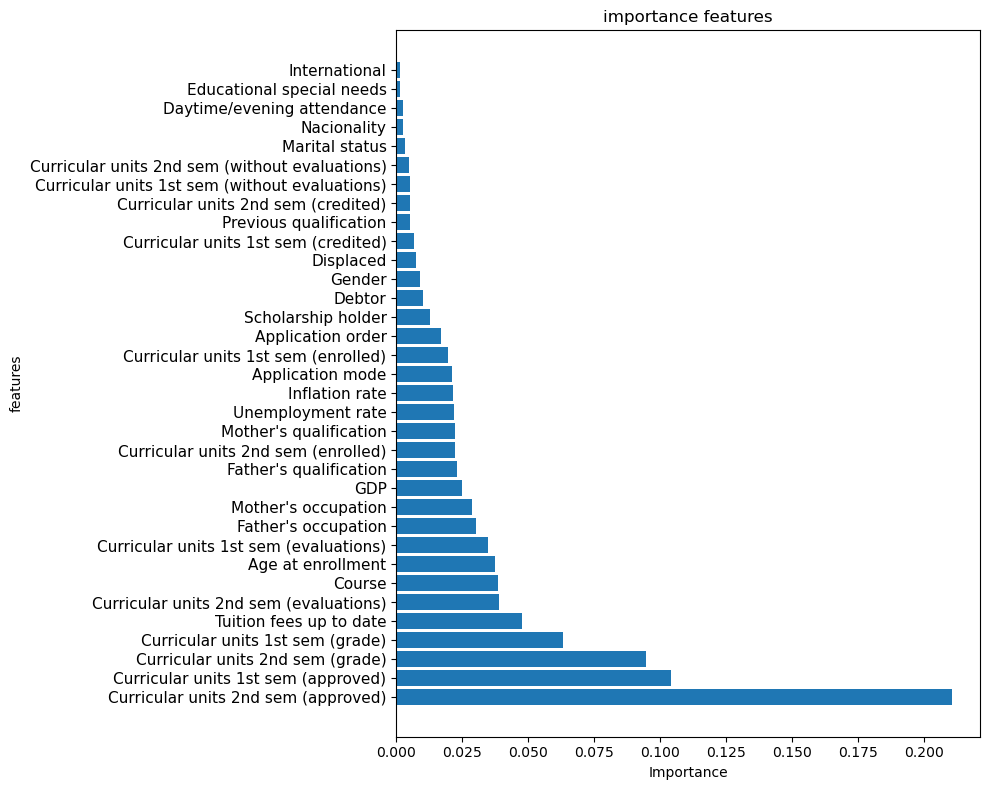

In [5]:
# les features importances
feature_importances = best_model.feature_importances_
features = X.columns
important_features = pd.DataFrame({'features': features, 'importance': feature_importances})
print(important_features.sort_values(by='importance', ascending=False))


indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 8))
plt.title('importance features')
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), features[indices], fontsize=11)
plt.xlabel('Importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()

## suppression de la classe Enrolled, avec objectif de seulement predire si un etudiant abandonnera ses etudes ou les terminera

In [6]:
filtered_data = data[data['Target'] != 'Enrolled']
filtered_data

X_filtered = filtered_data.drop('Target', axis=1)
y_filtered = filtered_data['Target']
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_filtered, y_train_filtered)

y_pred = clf.predict(X_test_filtered)

print("Accuracy: ", accuracy_score(y_test_filtered, y_pred), "\n")
print(classification_report(y_test_filtered, y_pred))

Accuracy:  0.8911845730027548 

              precision    recall  f1-score   support

     Dropout       0.90      0.81      0.85       277
    Graduate       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



In [7]:
# Optimisation

param_grid = {
    'n_estimators': [100, 300, 600, 1000],
    'max_depth': [7, 10, 15, 20, 25], 
    'max_features':  [None, 'sqrt', 0.2, 0.3, 0.4, 0.5], 
    'criterion': ['gini', 'entropy'] 
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_filtered, y_train_filtered)
best_params = grid_search.best_params_

resultats = {
    'n_estimators': [],
    'max_depth': [],
    'max_features': [],
    'criterion': []
}
resultats['n_estimators'].append(best_params.get('n_estimators'))
resultats['max_depth'].append(best_params.get('max_depth'))
resultats['max_features'].append(best_params.get('max_features'))
resultats['criterion'].append(best_params.get('criterion'))


df = pd.DataFrame(resultats)
print('les hyperparametres optimaux:')
display.display(df)


#evaluation
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.3f}\n')


y_pred = best_model.predict(X_test_filtered)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy sur l'ensemble de test apres optimisation: {accuracy:.3f}\n")
print(classification_report(y_test_filtered, y_pred))

les hyperparametres optimaux:


,n_estimators,max_depth,max_features,criterion
0,300,20,sqrt,entropy


Moyenne des scores de validation croisé: 0.909

Accuracy sur l'ensemble de test apres optimisation: 0.898

              precision    recall  f1-score   support

     Dropout       0.91      0.81      0.86       277
    Graduate       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



#### test: les classes sont un peu desequilibrés. Echantillonnage oversampling avec SMOTE pour reequilibrer la distribution des classes

In [6]:

smote = SMOTE(random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 300, 600, 1000],    
    'clf__max_depth': [7, 10, 15, 20, 25],
    'clf__max_features': [None, 'sqrt', 0.2, 0.3, 0.4, 0.5],
    'clf__criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("meilleurs params:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


meilleurs params: {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
accuracy: 0.7423728813559322
              precision    recall  f1-score   support

     Dropout       0.87      0.70      0.78       316
    Enrolled       0.42      0.49      0.45       151
    Graduate       0.80      0.86      0.83       418

    accuracy                           0.74       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.74      0.75       885

